In [3]:
# import libraries

import pandas as pd
import zipfile
import kaggle

In [4]:
# download the file directly through the Python library
kaggle.api.dataset_download_files('hmavrodiev/london-bike-sharing-dataset', path='.', unzip=True)

print("Dataset downloaded and unzipped successfully!")

Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset
Dataset downloaded and unzipped successfully!


In [5]:
#read in the csv file as a pandas dataframe
bikes = pd.read_csv('london_merged.csv')

In [6]:
#explore the data
bikes.info()

<class 'pandas.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  str    
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), str(1)
memory usage: 1.3 MB


In [7]:
bikes.shape

(17414, 10)

In [8]:
bikes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [9]:
#count unique values in the weather_code column
bikes.weather_code.value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [10]:
# count the unique values in the season column
bikes.season.value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [11]:
import pandas as pd

# Load the raw data
bikes = pd.read_csv('london_merged.csv')

# 2. Define renaming dictionary
new_cols_dict = {
    'timestamp': 'time',
    'cnt': 'count',
    't1': 'temp_real_C',
    't2': 'temp_feels_like_C',
    'hum': 'humidity_percent',
    'wind_speed': 'wind_speed_kph',
    'is_holiday': 'is_holiday',
    'is_weekend': 'is_weekend',
    'season': 'season'
}

# Rename the columns
bikes.rename(new_cols_dict, axis=1, inplace=True)

# 4. Transform values
bikes.humidity_percent = bikes.humidity_percent / 100

# Map categorical dictionaries
season_dict = {0: 'spring', 1: 'summer', 2: 'fall', 3: 'winter'}
weather_dict = {
    1: 'clear', 2: 'scattered clouds', 3: 'broken clouds', 
    4: 'cloudy', 7: 'rain', 10: 'rain with thunderstorm', 26: 'snowfall'
}
is_holiday_dict = {0.0: 'No', 1.0: 'Yes'}
is_weekend_dict = {0.0: 'No', 1.0: 'Yes'}

bikes['season'] = bikes['season'].map(season_dict)
bikes['weather_code'] = bikes['weather_code'].map(weather_dict)
bikes['is_holiday'] = bikes['is_holiday'].map(is_holiday_dict)
bikes['is_weekend'] = bikes['is_weekend'].map(is_weekend_dict)

# View final result
bikes.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,broken clouds,No,Yes,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,clear,No,Yes,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,clear,No,Yes,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,clear,No,Yes,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,clear,No,Yes,winter


In [12]:
# writing the final dataframe to an excel file to visualize 
bikes.to_csv('london_bikes_final.csv', index=False)

print("CSV file created successfully!")



CSV file created successfully!


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Convert categorical text back to numeric 'dummy' variables
bikes_ml = pd.get_dummies(bikes, columns=['season', 'weather_code', 'is_holiday', 'is_weekend'])

# Define Features (X) and Target (y)
# We exclude 'time' as it's a string, and 'count' because that's what we want to predict
X = bikes_ml.drop(['count', 'time'], axis=1)
y = bikes_ml['count']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
# Similar to your Breast Cancer project, but using Regressor instead of Classifier
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Evaluate
print(f"Model R2 Score: {r2_score(y_test, predictions):.2f}")

Model R2 Score: 0.24


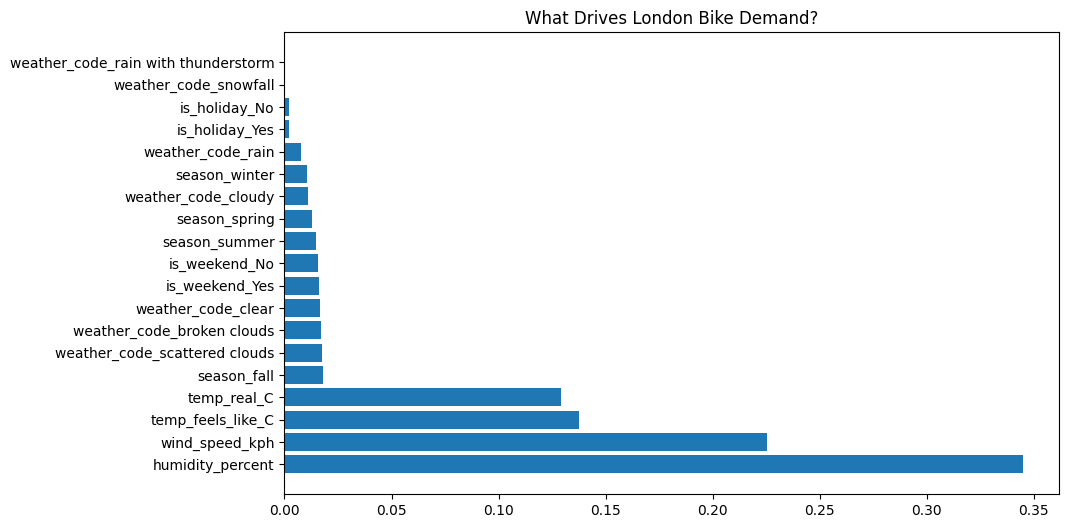

In [14]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('What Drives London Bike Demand?')
plt.show()